In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# COLUMNS actual meanings

age

sex 

chest pain type (4 values) 

resting blood pressure 

serum cholestoral in mg/dl 

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved 

exercise induced angina 

oldpeak = ST depression induced by exercise relative to rest 

the slope of the peak exercise ST segment 

number of major vessels (0-3) colored by flourosopy 

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


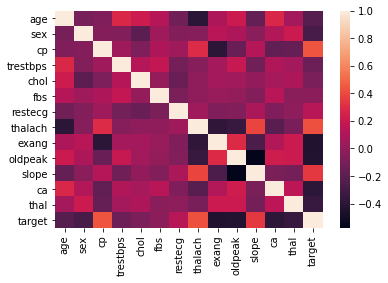

In [6]:
sns.heatmap(df.corr())

In [7]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
features = df.iloc[: , :-1]
target = df['target']

In [10]:
features.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

### DecisionTreeClassifier

In [12]:
from sklearn import tree
from sklearn.metrics import f1_score

clf_tree = tree.DecisionTreeClassifier(criterion='entropy',random_state=42)
clf_tree.fit(X_train, y_train)

tree_y_pred = clf_tree.predict(X_test)

f1_score(y_test, tree_y_pred)

0.7522935779816514

In [13]:
clf_tree = GridSearchCV(clf_tree , {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 5, 10, 15],
    'min_samples_split': [2, 3, 5, 7],
    'max_features': [2, 4, 6, 8]
}, return_train_score=False)

clf_tree.fit(features, target)
clf_tree.cv_results_

{'mean_fit_time': array([0.00446167, 0.00427828, 0.00426159, 0.00435433, 0.00441918,
        0.00446424, 0.00439987, 0.00460172, 0.00471921, 0.0043613 ,
        0.00434132, 0.00436835, 0.00452542, 0.00440764, 0.00449982,
        0.00444326, 0.0046968 , 0.004351  , 0.00438313, 0.00425191,
        0.00440407, 0.00448685, 0.00440741, 0.00442524, 0.00461512,
        0.00476694, 0.00462494, 0.00459833, 0.00460868, 0.00463624,
        0.00464573, 0.00460687, 0.00444441, 0.00498323, 0.00479593,
        0.00453258, 0.00468822, 0.00472898, 0.00608835, 0.00599318,
        0.00514207, 0.00477467, 0.00472674, 0.00475264, 0.00489221,
        0.00497789, 0.00489039, 0.00492415, 0.00458312, 0.00458941,
        0.0045711 , 0.00453992, 0.00462661, 0.00459881, 0.00459509,
        0.00452204, 0.00476966, 0.0047605 , 0.00523067, 0.00497704,
        0.00526762, 0.00501194, 0.00494518, 0.00490952, 0.0043396 ,
        0.00418215, 0.00414376, 0.00429659, 0.00424786, 0.00422492,
        0.0042407 , 0.00428433,

In [14]:
data = pd.DataFrame(clf_tree.cv_results_)

In [15]:
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004462,0.000371,0.002439,0.000061,entropy,2,2,2,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.557377,0.606557,0.622951,0.533333,0.583333,0.580710,0.032398,125
1,0.004278,0.000126,0.002390,0.000056,entropy,2,2,3,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.557377,0.606557,0.622951,0.533333,0.583333,0.580710,0.032398,125
2,0.004262,0.000047,0.002416,0.000052,entropy,2,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.557377,0.606557,0.622951,0.533333,0.583333,0.580710,0.032398,125
3,0.004354,0.000091,0.002445,0.000040,entropy,2,2,7,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.557377,0.606557,0.622951,0.533333,0.583333,0.580710,0.032398,125
4,0.004419,0.000036,0.002456,0.000044,entropy,2,4,2,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.754098,0.770492,0.737705,0.666667,0.733333,0.732459,0.035417,72


In [16]:
final_data = data[['param_max_depth', 'param_max_features', 'param_min_samples_split', 'mean_test_score']]

In [17]:
final_data.head()

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
0,2,2,2,0.580710
1,2,2,3,0.580710
2,2,2,5,0.580710
3,2,2,7,0.580710
4,2,4,2,0.732459


In [18]:
final_data.nlargest(5, 'mean_test_score')

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
87,5,4,7,0.781967
91,5,6,7,0.781639
38,10,4,5,0.775464
54,15,4,5,0.775464
24,5,6,2,0.775246


In [19]:
# The best params for decision tree
clf_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 4,
 'min_samples_split': 7}

In [20]:
# The best score for decision tree 
clf_tree.best_score_

0.781967213114754

### Logistic Regression Classifier

In [21]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=42, max_iter=500)

In [22]:
clf_lr = clf_lr.fit(X_train, y_train)

lr_y_pred = clf_lr.predict(X_test)

f1_score(y_test, lr_y_pred)

# Logistic Regression provided 82% accuracy (best one so far)

0.8245614035087718

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)

clf_rf = clf_rf.fit(X_train, y_train)

rf_y_pred = clf_rf.predict(X_test)

f1_score(y_test, rf_y_pred)

# Random Forest provided 86% accuracy without tuning any parameters (best one)

0.8596491228070176

In [24]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_depth' : [3,4],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [2,3]
}

clf_rfc = RandomForestClassifier(random_state=42)

clf_rfc = GridSearchCV(estimator = clf_rfc , param_grid = param_grid, cv=3, return_train_score=False)

In [25]:
clf_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]})

In [26]:
clf_rfc.cv_results_

{'mean_fit_time': array([0.21406261, 0.42420459, 0.21448263, 0.42378298, 0.2141637 ,
        0.42407592, 0.22459475, 0.42281278, 0.23412673, 0.43329827,
        0.21330523, 0.42530417, 0.21746429, 0.42988586, 0.2192204 ,
        0.43215569, 0.21755163, 0.43546979, 0.21757778, 0.42760332,
        0.2164739 , 0.43063354, 0.21703331, 0.46120556, 0.24836389,
        0.43362935, 0.21742535, 0.43522159, 0.21821745, 0.42708572,
        0.21620576, 0.4313585 , 0.2192719 , 0.4282136 , 0.21624041,
        0.4250435 , 0.21796179, 0.43302457, 0.22777096, 0.44768818,
        0.22364688, 0.43898161, 0.21752659, 0.42871634, 0.21781516,
        0.43170285, 0.21781484, 0.42888419]),
 'std_fit_time': array([0.00189139, 0.00123447, 0.00304434, 0.00040403, 0.0011381 ,
        0.00191258, 0.01518812, 0.00248953, 0.02385775, 0.00360009,
        0.00127485, 0.00291578, 0.00128747, 0.00513216, 0.00059024,
        0.00435701, 0.0018475 , 0.00771965, 0.00329405, 0.00031172,
        0.00118848, 0.00281389, 0.002

In [27]:
rfc_df = pd.DataFrame(clf_rfc.cv_results_)

In [28]:
rfc_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.214063,0.001891,0.013043,0.000371,gini,3,1,2,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.852941,0.764706,0.835821,0.817823,0.038204,22
1,0.424205,0.001234,0.022686,0.000728,gini,3,1,2,200,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.838235,0.750000,0.850746,0.812994,0.044835,26
2,0.214483,0.003044,0.012896,0.000280,gini,3,1,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.852941,0.764706,0.835821,0.817823,0.038204,22
3,0.423783,0.000404,0.022380,0.000172,gini,3,1,3,200,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.838235,0.750000,0.850746,0.812994,0.044835,26
4,0.214164,0.001138,0.013093,0.000241,gini,3,2,2,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.838235,0.764706,0.835821,0.812921,0.034107,28


In [29]:
clf_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [30]:
clf_rfc.best_score_

0.8424056189640035